In [1]:
# @title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/distan_lat42.58lon-8.8046p3R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
# @title Get station and sample max gust hour before
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/coron.csv", usecols = ["time","gust_o"],parse_dates=["time"]).set_index("time")


#delete duplicated
station = station[~station.index.duplicated(keep='first')]

#resample max hour before

station = station.resample("H",label="right",closed="right").max()
print("Variable statistics")
print(station.describe())

Variable statistics
             gust_o
count  43179.000000
mean       7.621251
std        4.389027
min        0.000000
25%        3.972225
50%        7.083339
75%       10.694453
max       34.694472


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41378 entries, 2018-01-01 01:00:00 to 2022-12-30 23:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_o       41378 non-null  float64
 1   dir0         41378 non-null  float64
 2   snow_prec0   41378 non-null  float64
 3   snowlevel0   41378 non-null  float64
 4   mod0         41378 non-null  float64
 5   wind_gust0   41378 non-null  float64
 6   mslp0        41378 non-null  float64
 7   temp0        41378 non-null  float64
 8   rh0          41378 non-null  float64
 9   visibility0  41378 non-null  float64
 10  lhflx0       41378 non-null  float64
 11  lwflx0       41378 non-null  float64
 12  conv_prec0   41378 non-null  float64
 13  prec0        41378 non-null  float64
 14  swflx0       41378 non-null  float64
 15  shflx0       41378 non-null  float64
 16  cape0        41378 non-null  float64
 17  cin0         41378 non-null  float64
 18  cfh0       

None

best correlation observed and meteorological model variables
gust_o        1.000000
mod0          0.795479
wind_gust1    0.788139
wind_gust0    0.775980
wind_gust2    0.774862
mod1          0.770160
mod2          0.763371
lhflx2        0.286227
lhflx1        0.264623
lhflx0        0.263654
Name: gust_o, dtype: float64


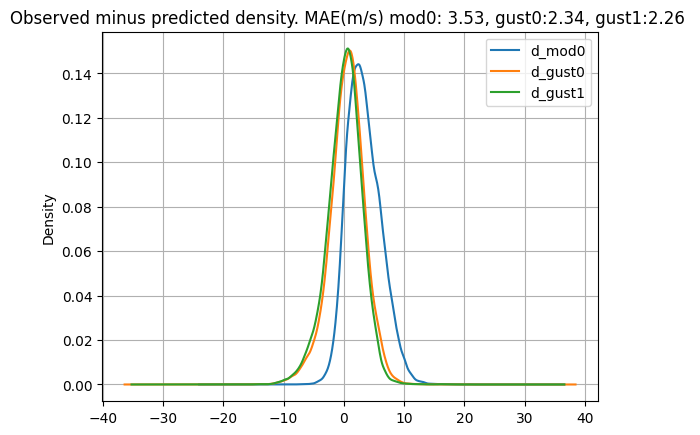

In [22]:
# @title Get meteorologic model d0 .Concatenate with station. MAE (m/s) meteorological model variables and observed variables. Select best point and variable from the meteorological model

from sklearn.metrics import mean_absolute_error

#load meteorological model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/lat42.58lon-8.8046p3R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time").drop_duplicates()

df_all = pd.concat([station,met_model],axis=1).dropna()
display(df_all.info())

# best correlation observed and meteorological model
print("best correlation observed and meteorological model variables")
print(df_all.corr()["gust_o"].sort_values(ascending=False).head(10))

#errors (MAE) in m/s and differences
e_mod0= mean_absolute_error(df_all.gust_o, df_all.mod0)
d_mod0 = df_all.gust_o.values-df_all.mod0.values
e_mod1 = mean_absolute_error(df_all.gust_o, df_all.mod1)
d_mod1 = df_all.gust_o.values-df_all.mod1.values

e_gust0 = mean_absolute_error(df_all.gust_o, df_all.wind_gust0)
d_gust0 = df_all.gust_o.values-df_all.wind_gust0.values
e_gust1 = mean_absolute_error(df_all.gust_o, df_all.wind_gust1)
d_gust1 = df_all.gust_o.values-df_all.wind_gust1.values # lowest value
e_gust2 = mean_absolute_error(df_all.gust_o, df_all.wind_gust2)
d_gust2 = df_all.gust_o.values-df_all.wind_gust2.values

#Select best point and variable from the meteorological model
mae_met = round(e_gust1,2)

pd.DataFrame({"d_mod0":d_mod0,"d_mod0":d_mod0,"d_gust0":d_gust0,"d_gust1":d_gust1,
              }).plot(kind="kde", grid=True,
                      title ="Observed minus predicted density. MAE(m/s) mod0: {:0.2f}, gust0:{:0.2f}, gust1:{:0.2f} ".format(e_mod0,e_gust0,e_gust1));


machine learning number: 0
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.608573     7.616587     0.008014
std       4.331593     3.662186     2.392286
min       0.000000     1.406251   -14.897373
25%       4.000003     4.512573    -1.448612
50%       7.083339     7.077853     0.028056
75%      10.611120    10.180355     1.481147
max      29.250023    21.812934     9.613897
machine learning number: 1
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.684845     7.675613    -0.009232
std       4.393600     3.757172     2.354273
min       0.000000     1.469723   -12.767232
25%       4.000003     4.444795    -1.423057
50%       7.180561     7.157992     0.063889
75%      10.854175    10.300008     1.434480
max      28.083356    26.371410    10.657925
machine learning number: 2
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.640989 

,MAE
count,10.000000
mean,1.818000
std,0.011353
min,1.800000
25%,1.810000
50%,1.820000
75%,1.820000
max,1.840000


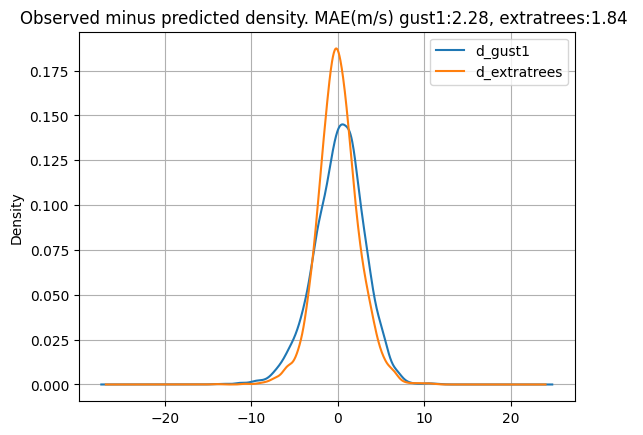

In [58]:
# @title Extratreesregressor


from sklearn.ensemble import ExtraTreesRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = ExtraTreesRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_extratrees"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_extratrees = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results[["d_gust1","d_extratrees"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, extratrees:{:0.2f} ".format(e_gust1,e_extratrees));

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 37240, number of used features: 7
[LightGBM] [Info] Start training from score 7.636918
machine learning number: 0
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.608573     7.601375    -0.007198
std       4.331593     3.644049     2.348083
min       0.000000     2.234792   -15.126432
25%       4.000003     4.414365    -1.404782
50%       7.083339     7.062602     0.045067
75%      10.611120    10.158569     1.405606
max      29.250023    20.443724     8.190784
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number 

,MAE
count,10.000000
mean,1.794000
std,0.022211
min,1.750000
25%,1.782500
50%,1.795000
75%,1.800000
max,1.830000


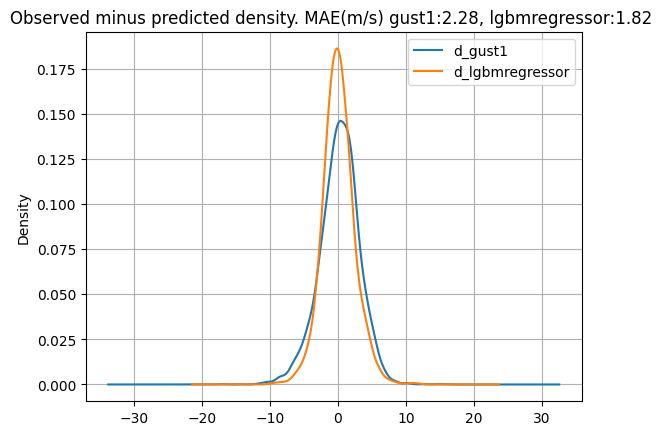

In [14]:
# @title LGBMRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
d_lgbmregressor = df_results['d_lgbmregressor']
df_results[["d_gust1","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor:{:0.2f} ".format(e_gust1,e_lgbm));

In [15]:
# @title Shapiro test normality MAE samples tested
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")


p value: 0.677376389503479
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


In [16]:
# @title T test (1sample) compare machine learning mean absolute error in a sample (n=10) versus meteorological model mean absolute error at point 1 (wind_gust1 =2.26). The alternative hypothesis is: the sample mean absolute error of the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01

from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=2.26, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [1.79, 1.78, 1.78, 1.83, 1.75, 1.79, 1.8, 1.8, 1.8, 1.82]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1868
[LightGBM] [Info] Number of data points in the train set: 37240, number of used features: 10
[LightGBM] [Info] Start training from score 7.636918
machine learning number: 0
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.608573     7.606267    -0.002306
std       4.331593     3.690033     2.240833
min       0.000000     1.696578   -17.277865
25%       4.000003     4.476193    -1.310410
50%       7.083339     7.034013     0.065255
75%      10.611120    10.239445     1.361429
max      29.250023    20.352170     9.050920
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

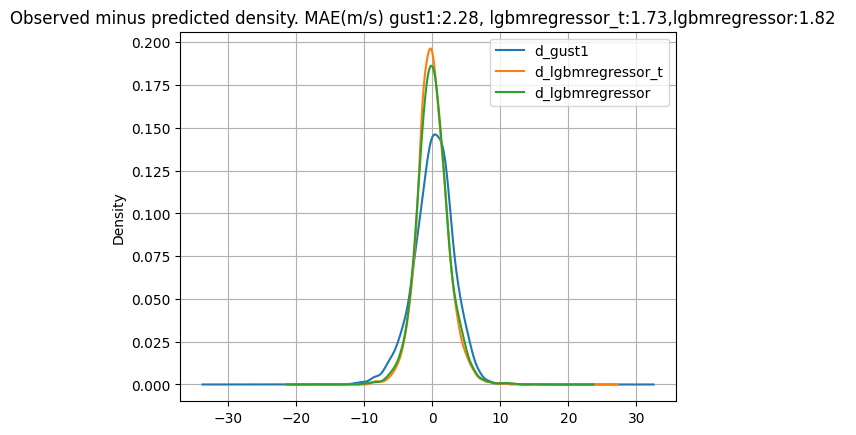

In [17]:
# @title Add time variables

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()
#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor_t"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm_t = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results["d_lgbmregressor"] = d_lgbmregressor
df_results[["d_gust1","d_lgbmregressor_t","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor_t:{:0.2f},lgbmregressor:{:0.2f}  ".format(e_gust1,e_lgbm_t,e_lgbm));


In [18]:
# @title T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")

#select mae_ml
mae_ml = np.round(MAE_t,3)[-1]


MAE without time variables: [1.79 1.78 1.78 1.83 1.75 1.79 1.8  1.8  1.8  1.82]

MAE with time variables: [1.69 1.68 1.69 1.71 1.65 1.69 1.71 1.7  1.7  1.73]

alpha:  0.01

p_value point:  2.5905325626998358e-11

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


In [23]:
# @title Save algorithm
import pickle
from sklearn.pipeline import Pipeline

score ={"MAE_met":mae_met,"MAE_ml":mae_ml}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Coron/algorithms/gust_coron_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
